In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
from google.colab import files
upload = files.upload()
df=pd.read_csv('heart.csv')


Saving heart.csv to heart (3).csv


In [11]:
df.shape


(303, 14)

In [12]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [13]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


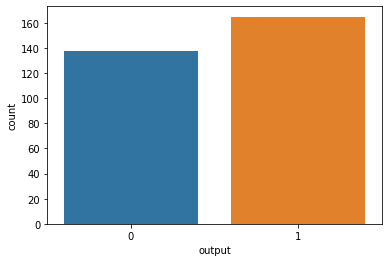

In [14]:
sns.countplot(df['output'])

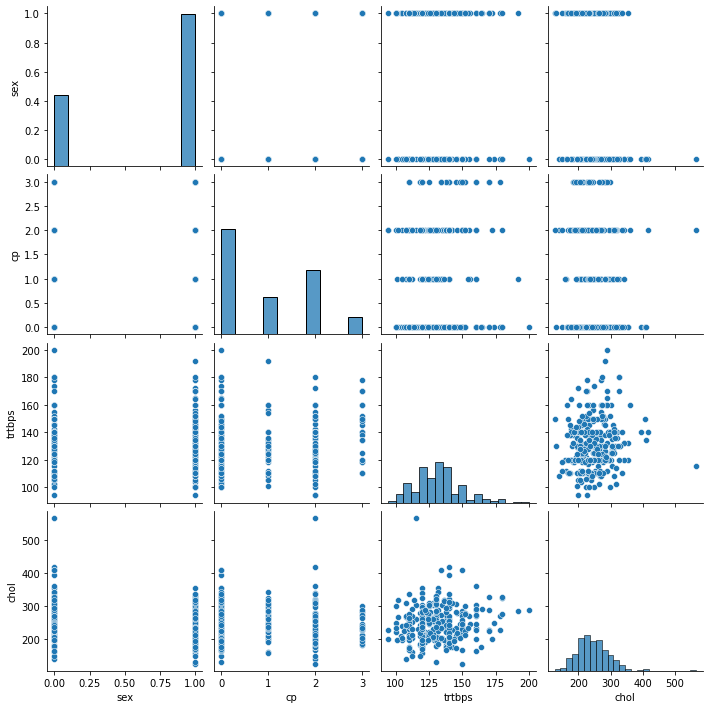

In [15]:
sns.pairplot(df.iloc[:,1:5])

In [18]:
df.iloc[:,1:14].corr()

,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
sex,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696
slp,-0.030711,0.119717,-0.121475,-0.004038,-0.059894,0.093045,0.386784,-0.257748,-0.577537,1.000000,-0.080155,-0.104764,0.345877


In [41]:
X = df.iloc[:,1:13].values
Y = df.iloc[:,13].values


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [44]:
def models(X_train, Y_train):
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state=0)
  log.fit(X_train, Y_train)
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
  tree.fit(X_train, Y_train)
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state=0)
  forest.fit(X_train, Y_train)
  print('[0]Logisistic Regression Training Accuracy', log.score(X_train, Y_train))
  print('[1]decision tree Training Accuracy', tree.score(X_train, Y_train))
  print('[2]decision tree Training Accuracy', forest.score(X_train, Y_train))
  return log, tree, forest



In [45]:
model = models(X_train, Y_train)

[0]Logisistic Regression Training Accuracy 0.8590308370044053
[1]decision tree Training Accuracy 1.0
[2]decision tree Training Accuracy 0.986784140969163


In [48]:
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
  print("model",i)
  cm = confusion_matrix(Y_test, model[i].predict(X_test))
  print(cm)
  TP = cm[0][0]
  TN = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]
  print((TP + TN)/(TP + TN + FN + FP))

model 0
[[24  9]
 [ 4 39]]
0.8289473684210527
model 1
[[24  9]
 [13 30]]
0.7105263157894737
model 2
[[27  6]
 [ 7 36]]
0.8289473684210527


In [51]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
for i in range(len(model)):
  print(classification_report(Y_test, model[i].predict(X_test)))
  print(accuracy_score(Y_test, model[i].predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        33
           1       0.81      0.91      0.86        43

    accuracy                           0.83        76
   macro avg       0.83      0.82      0.82        76
weighted avg       0.83      0.83      0.83        76

0.8289473684210527
              precision    recall  f1-score   support

           0       0.65      0.73      0.69        33
           1       0.77      0.70      0.73        43

    accuracy                           0.71        76
   macro avg       0.71      0.71      0.71        76
weighted avg       0.72      0.71      0.71        76

0.7105263157894737
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        33
           1       0.86      0.84      0.85        43

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83   

In [53]:
pred = model[1].predict(X_test)
print(pred)
print(Y_test)

[0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0
 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0
 0 0]
[0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0
 0 1]
